In [1]:
import cv2
import random
import imutils
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
images_dir = "C:/Users/user/Downloads/VIP/[TDS3651] Project/sub/040603"
image_files = os.listdir(images_dir)

In [3]:
image_path = "{}/{}".format(images_dir, "car2005.png")

In [4]:
# Convert to Grayscale Image
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Canny Edge Detection
canny_edge = cv2.Canny(gray_image, 170, 200)

# Find contours based on Edges
contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]

# Initialize license Plate contour and x,y coordinates
contour_with_license_plate = None
license_plate = None
x = None
y = None
w = None
h = None

# Find the contour with 4 potential corners and creat ROI around it
for contour in contours:
        # Find Perimeter of contour and it should be a closed contour
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
        if len(approx) == 4: #see whether it is a Rect
            contour_with_license_plate = approx
            x, y, w, h = cv2.boundingRect(contour)
            license_plate = gray_image[y:y + h, x:x + w]
            break

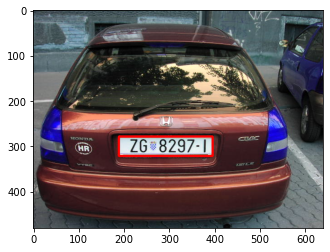

In [5]:
# Removing Noise from the detected image
license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
(thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)

image = cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 3) 

#cv2.imshow("License Plate Detection",image)
#cv2.waitKey(0)
plt.imshow(image)